In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import nltk
from os import listdir
from os.path import isfile, join


sns.set(rc={'figure.figsize':(15,8.27)})
sns.set(style="whitegrid")

In [2]:
example_file_path = '/Users/attilanagy/Personal/hu-nmt/data/ftp.mokk.bme.hu/Hunglish2/classic.lit/bi/Andersen_1.bi'
base_data_dir = '/Users/attilanagy/Personal/hu-nmt/data/ftp.mokk.bme.hu/Hunglish2'
domains = [
    'classic.lit',
    'law',
    'modern.lit',
    'softwaredocs',
    'subtitles'
]

## Notes
### Law folder is not in the same structure as the others
 Copied files from law/nonagg/1/bi and law/nonagg/2 to law/bi

In [3]:
def dump_domain_content_to_file(sentences, domain):
    with open(f'{domain}.txt', 'w+') as f:
        for sentence_pair in sentences:
            f.write('\t'.join(sentence_pair)+'\n')

In [4]:
sentence_pairs = []
malformed_lines = {}
for domain in domains: 
    # domain = domains[0]
    domain_path = f'{base_data_dir}/{domain}/bi'
    files = [f for f in listdir(f'{domain_path}') if isfile(join(f'{domain_path}', f))]
    for file in files:
        with open(f'{domain_path}/{file}', 'r', encoding='latin2') as f:
            for line in f:
                try:
                    hun_eng_sentence_pair = line.rstrip('\n').split('\t')
                    hun_eng_sentence_pair.append(domain)
                    if len(hun_eng_sentence_pair) != 3: # hun-eng-dom
                        raise ValueError(f'Hun-eng sentence pair {hun_eng_sentence_pair} has bad formatting')
                    sentence_pairs.append(hun_eng_sentence_pair)
                except:
                    if domain not in malformed_lines:
                        malformed_lines[domain] = []
                    malformed_lines[domain].append((f'line: {line}', f'file: {file}'))

## Check lines where we could not separate by \t

In [5]:
print(json.dumps(malformed_lines, sort_keys=True, indent=2))

{
  "law": [
    [
      "line: \b\n",
      "file: .DS_Store"
    ],
    [
      "line: \n",
      "file: .DS_Store"
    ],
    [
      "line: ]ShowStatusBar[ShowPathbar[ShowToolbar[ShowTabView_\u0010\u0014ContainerShowSidebar\\WindowBounds[ShowSidebar\b\b\t\b\t_\u0010\u0018{{511, 515}, {770, 436}}\t\b\u0017%1=I`myz{|}~\u0099\u0000\u0000\u0000\u0000\u0000\u0000\u0001\u0001\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u000f\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u009a\u0000\u0000\u0000\u0002\u0000b\u0000ivSrnlong\u0000\u0000\u0000\u0001\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u

In [ ]:
# use this to concat separate files to a single domain-specific file
dump_domain_content_to_file(sentence_pairs, domain)

In [8]:
print(json.dumps({domain: len(malformed_lines[domain]) for domain in malformed_lines}, sort_keys=True, indent=2))

{
  "law": 3
}


In [11]:
sentence_pairs[:10]

[['', '', 'classic.lit'],
 ['A 11. esztendőben, a hónap elsején az Úr szózatot intézett hozzám: "Emberfia, Tírusz így nevetett Jeruzsálemen: Összetört a népek kapuja és felém fordult.',
  'And it came to pass in the eleventh year, the first day of the month, that the word of the Lord came to me, saying: ',
  'classic.lit'],
 ['A 11. esztendőben, az első hónapban, a hó hetedik napján az Úr ezt a szózatot intézte hozzám: Emberfia, összetörtem a fáraónak, Egyiptom királyának a karját.',
  'And it came to pass in the eleventh year, in the first month, in the seventh day of the month, that the word of the Lord came, me, saying: ',
  'classic.lit'],
 ['A 145. esztendő Kiszleu hónapjának tizenötödik napján a király az égőáldozat oltárán szörnyű undokságot épített, és Izrael helységeiben mindenféle oltárokat emeltek.',
  'On the fifteenth day of the month, Casleu, in the hundred and forty-fifth year, king Antiochus set up the abominable idol of desolation upon the altar of God, and they built 

In [12]:
len(sentence_pairs)

2985534

In [13]:
df = pd.DataFrame(sentence_pairs, columns=['hun', 'eng', 'domain'])

In [14]:
df

,hun,eng,domain
0,,,classic.lit
1,"A 11. esztendőben, a hónap elsején az Úr szóza...","And it came to pass in the eleventh year, the ...",classic.lit
2,"A 11. esztendőben, az első hónapban, a hó hete...","And it came to pass in the eleventh year, in t...",classic.lit
3,A 145. esztendő Kiszleu hónapjának tizenötödik...,"On the fifteenth day of the month, Casleu, in ...",classic.lit
4,A 148. esztendőben a kilencedik hónap - azaz a...,And they arose before the morning on the five ...,classic.lit
...,...,...,...
2985529,Zsoldos?,Mercenary?,subtitles
2985530,Zsúfolt hely.,Crowded.,subtitles
2985531,Zsugori geci.,"""Early Girl.""",subtitles
2985532,"Zsugoriság... akasztás, önpusztítás.","Avarice... hanging, self-destruction.",subtitles


In [54]:
df['hun_len_word'] = df['hun'].apply(lambda x: len(x.split()))
df['eng_len_word'] = df['eng'].apply(lambda x: len(x.split()))
df['hun_len_char'] = df['hun'].apply(len)
df['eng_len_char'] = df['eng'].apply(len)
df['hun_eng_len_diff_word'] = abs(df['hun_len_word'] - df['eng_len_word'])
df['hun_eng_len_diff_char'] = abs(df['hun_len_char'] - df['eng_len_char'])


In [55]:
df

,hun,eng,domain,hun_len_word,eng_len_word,hun_len_char,eng_len_char,hun_eng_len_diff_word,hun_eng_len_diff_char
0,,,classic.lit,0,0,0,0,0,0
1,"A 11. esztendőben, a hónap elsején az Úr szóza...","And it came to pass in the eleventh year, the ...",classic.lit,23,25,154,116,2,38
2,"A 11. esztendőben, az első hónapban, a hó hete...","And it came to pass in the eleventh year, in t...",classic.lit,25,29,157,139,4,18
3,A 145. esztendő Kiszleu hónapjának tizenötödik...,"On the fifteenth day of the month, Casleu, in ...",classic.lit,21,40,165,228,19,63
4,A 148. esztendőben a kilencedik hónap - azaz a...,And they arose before the morning on the five ...,classic.lit,28,28,187,152,0,35
...,...,...,...,...,...,...,...,...,...
2985529,Zsoldos?,Mercenary?,subtitles,1,1,8,10,0,2
2985530,Zsúfolt hely.,Crowded.,subtitles,2,1,13,8,1,5
2985531,Zsugori geci.,"""Early Girl.""",subtitles,2,2,13,13,0,0
2985532,"Zsugoriság... akasztás, önpusztítás.","Avarice... hanging, self-destruction.",subtitles,3,3,36,37,0,1


In [60]:
def get_basic_stats(metric_dict, col):
    metric_dict['q0.25'] = str(df[col].quantile(q=0.25))
    metric_dict['q0.5'] = str(df[col].quantile(q=0.5))
    metric_dict['q0.75'] = str(df[col].quantile(q=0.75))
    metric_dict['q0.99'] = str(df[col].quantile(q=0.99))
    metric_dict['q0.999'] = str(df[col].quantile(q=0.999))
    metric_dict['min'] = str(df[col].min())
    metric_dict['max'] = str(df[col].max())
    metric_dict['mean'] = str(df[col].mean())
    metric_dict['stdev'] = str(df[col].std())
    
    return metric_dict

def get_len_metrics(df):
    metrics = {}
    for mode in ['word', 'char']:
        metrics[mode] = {}
        for language in ['hun', 'eng']:
            col = f'{language}_len_{mode}'
            metrics[mode][language] = {}
            metrics[mode][language] = get_basic_stats(metrics[mode][language], col)
        
        metrics[mode]['hun_eng_diff'] = {}
        metrics[mode]['hun_eng_diff'] = get_basic_stats(metrics[mode]['hun_eng_diff'], f'hun_eng_len_diff_{mode}')
        
    return metrics

In [61]:
len_metrics = get_len_metrics(df)
print(json.dumps(len_metrics, sort_keys=True, indent=4))

{
    "char": {
        "eng": {
            "max": "4000",
            "mean": "68.1507345084665",
            "min": "0",
            "q0.25": "25.0",
            "q0.5": "48.0",
            "q0.75": "89.0",
            "q0.99": "318.0",
            "q0.999": "703.0",
            "stdev": "70.68567146617336"
        },
        "hun": {
            "max": "4000",
            "mean": "67.9178793475472",
            "min": "0",
            "q0.25": "25.0",
            "q0.5": "48.0",
            "q0.75": "88.0",
            "q0.99": "322.0",
            "q0.999": "705.0",
            "stdev": "71.22719695876599"
        },
        "hun_eng_diff": {
            "max": "838",
            "mean": "9.847961872147495",
            "min": "0",
            "q0.25": "3.0",
            "q0.5": "6.0",
            "q0.75": "13.0",
            "q0.99": "53.0",
            "q0.999": "94.0",
            "stdev": "11.446888453244355"
        }
    },
    "word": {
        "eng": {
            "max": "

## Sample sentence length distribution - word and character level

[Text(0.5, 0, 'ENG - Sentence length (char)'), Text(0, 0.5, 'Frequency')]

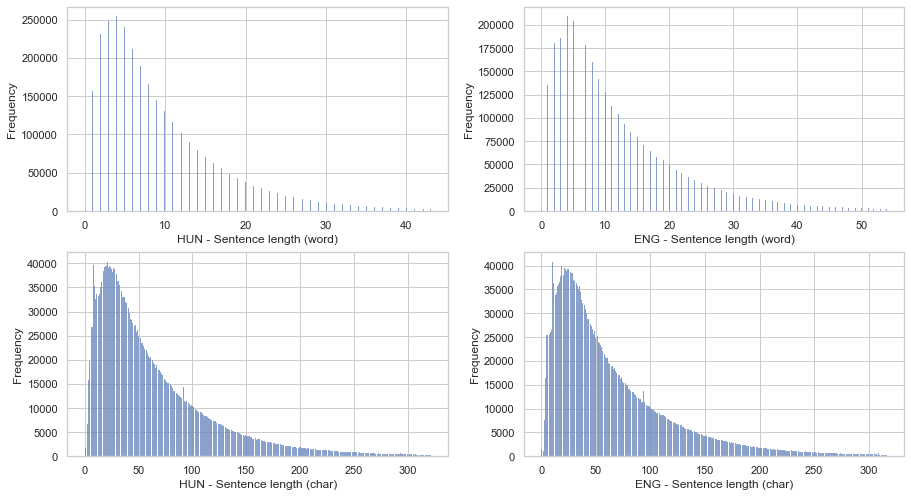

In [63]:
fig, axs = plt.subplots(2,2)

sns.histplot(df[df['hun_len_word'] < int(float(len_metrics['word']['hun']['q0.99']))]['hun_len_word'], ax=axs[0, 0])
axs[0, 0].set(xlabel='HUN - Sentence length (word)', ylabel='Frequency')

sns.histplot(df[df['eng_len_word'] < int(float(len_metrics['word']['eng']['q0.99']))]['eng_len_word'], ax=axs[0, 1])
axs[0, 1].set(xlabel='ENG - Sentence length (word)', ylabel='Frequency')

sns.histplot(df[df['hun_len_char'] < int(float(len_metrics['char']['hun']['q0.99']))]['hun_len_char'], ax=axs[1, 0])
axs[1, 0].set(xlabel='HUN - Sentence length (char)', ylabel='Frequency')

sns.histplot(df[df['eng_len_char'] < int(float(len_metrics['char']['eng']['q0.99']))]['eng_len_char'], ax=axs[1, 1])
axs[1, 1].set(xlabel='ENG - Sentence length (char)', ylabel='Frequency')




## Hun-Eng length difference distribution

[Text(0.5, 0, 'Hun-Eng length diff (char)'), Text(0, 0.5, 'Frequency')]

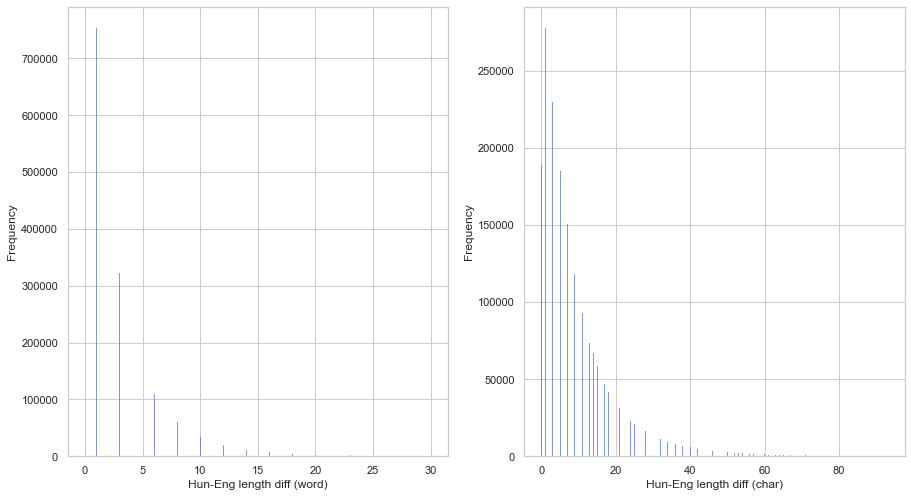

In [66]:
fig, axs = plt.subplots(1,2)

sns.histplot(df[df['hun_eng_len_diff_word'] < int(float(len_metrics['word']['hun_eng_diff']['q0.999']))]['hun_eng_len_diff_word'], ax=axs[0])
axs[0].set(xlabel='Hun-Eng length diff (word)', ylabel='Frequency')

sns.histplot(df[df['hun_eng_len_diff_char'] < int(float(len_metrics['char']['hun_eng_diff']['q0.999']))]['hun_eng_len_diff_char'], ax=axs[1])
axs[1].set(xlabel='Hun-Eng length diff (char)', ylabel='Frequency')

## Domain distribution

In [20]:
freqs = df[['hun', 'domain']].groupby('domain').count().reset_index()
freqs

,domain,hun
0,classic.lit,652142
1,law,184460
2,modern.lit,1670129
3,softwaredocs,135472
4,subtitles,343331


2985534


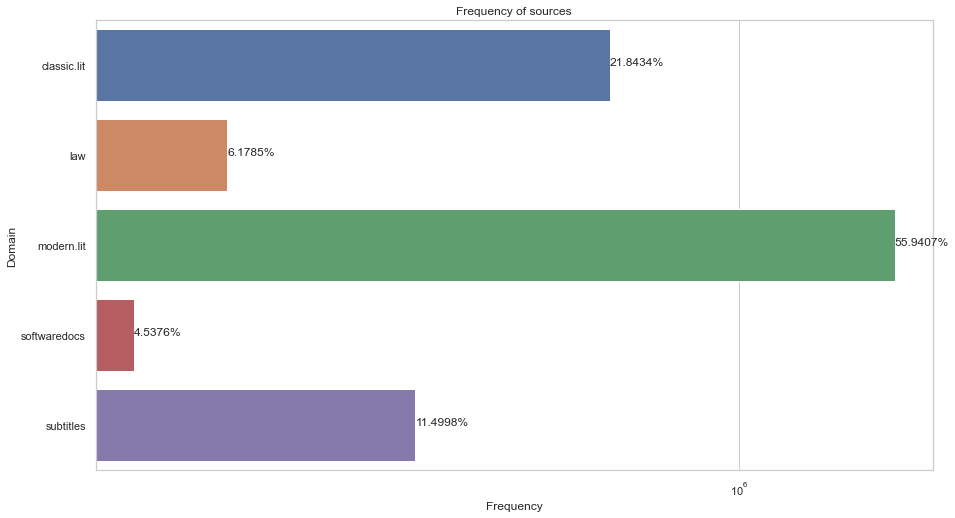

In [21]:
ax = sns.barplot(x='hun' ,y='domain', data=freqs)
ax.set_xscale("log")
ax.set_title('Frequency of sources')
ax.set(xlabel='Frequency', ylabel='Domain')

total = freqs['hun'].sum()
print(total)
for p in ax.patches:
        percentage = '{:.4f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

### Category distribution does not match original
Original distribution: http://mokk.bme.hu/resources/hunglishcorpus/


In [22]:
# num of bisentences
total = 4151
reported_cnts = {
    'modern.lit': 1670,
    'classical.lit': 652,
    'subtitles': 343,
    'softwaredocs': 135,
    'law': 1351
}
reported_ratios = {domain: reported_cnts[domain]/total for domain in reported_cnts}
print(json.dumps(reported_ratios, sort_keys=True, indent=2))

{
  "classical.lit": 0.15707058540110816,
  "law": 0.3254637436762226,
  "modern.lit": 0.40231269573596723,
  "softwaredocs": 0.032522283787039266,
  "subtitles": 0.08263069139966273
}


## Vocabulary

In [43]:
def get_vocab(corpus, n_gram=1):
    """
    corpus: list of sentences
    """
    vocab_dict = {}
    if n_gram == 1:
        for sentence in corpus:
            words = sentence.split()
            for word in words:
                word = word.lower()
                if word not in vocab_dict:
                    vocab_dict[word] = 1
                else:
                    vocab_dict[word] += 1
    elif n_gram == 2:
        for sentence in corpus:
            bigrams = tuple(nltk.bigrams(sentence.split()))
            for bigram in bigrams:
                bigram = tuple(x.lower() for x in bigram)
                if bigram not in vocab_dict:
                    vocab_dict[bigram] = 1
                else:
                     vocab_dict[bigram] += 1
    elif n_gram == 3:
        for sentence in corpus:
            trigrams = tuple(nltk.trigrams(sentence.split()))
            for trigram in trigrams:
                trigram = tuple(x.lower() for x in trigram)
                if trigram not in vocab_dict:
                    vocab_dict[trigram] = 1
                else:
                     vocab_dict[trigram] += 1
                        
    return vocab_dict  

hun_sentences = [item[0] for item in sentence_pairs]
eng_sentences = [item[1] for item in sentence_pairs]

In [48]:
hun_vocab = get_vocab(hun_sentences)
eng_vocab = get_vocab(eng_sentences)
hun_bigrams = get_vocab(hun_sentences, 2)
eng_bigrams = get_vocab(eng_sentences, 2)

In [49]:
print(f'Hun vocab size: {len(hun_vocab)}\nEng vocab size: {len(eng_vocab)}')

Hun vocab size: 1626335
Eng vocab size: 682842


In [50]:
sorted(((v,k) for k,v in eng_vocab.items()), reverse=True)

[(2180602, 'the'),
 (977697, 'of'),
 (956976, 'and'),
 (914943, 'to'),
 (751239, 'a'),
 (571415, 'in'),
 (445634, 'he'),
 (421078, 'was'),
 (412475, 'i'),
 (369362, 'that'),
 (308187, 'it'),
 (302266, 'you'),
 (301204, 'his'),
 (274570, 'for'),
 (256544, 'had'),
 (249755, 'with'),
 (222889, 'on'),
 (217174, 'as'),
 (214664, 'be'),
 (205903, 'at'),
 (200248, 'is'),
 (193841, 'not'),
 (180935, 'she'),
 (175182, 'but'),
 (159319, 'this'),
 (156476, 'her'),
 (155056, 'they'),
 (154502, 'have'),
 (142509, 'from'),
 (128513, 'my'),
 (126839, 'by'),
 (125444, 'all'),
 (125337, '-'),
 (119875, 'were'),
 (113828, 'or'),
 (107397, 'no'),
 (105223, 'said'),
 (101772, 'what'),
 (101482, 'we'),
 (98252, 'one'),
 (96894, 'if'),
 (95983, 'are'),
 (95123, 'would'),
 (93203, 'an'),
 (90640, 'which'),
 (89547, 'him'),
 (89182, 'there'),
 (87949, 'been'),
 (87778, 'out'),
 (83888, 'so'),
 (80238, 'into'),
 (79240, 'when'),
 (77996, 'me'),
 (77768, 'could'),
 (77671, 'your'),
 (77631, 'their'),
 (73621, '

In [51]:
sorted(((v,k) for k,v in hun_vocab.items()), reverse=True)

[(2272769, 'a'),
 (806688, 'az'),
 (669638, 'és'),
 (597480, '-'),
 (488724, 'hogy'),
 (432359, 'nem'),
 (284872, 'egy'),
 (202904, 'is'),
 (184079, 'de'),
 (136773, 'ha'),
 (132292, 'meg'),
 (121061, 'csak'),
 (121022, 'ez'),
 (114975, 'még'),
 (111107, 'volt'),
 (102784, 'azt'),
 (96652, 'már'),
 (96259, 'vagy'),
 (95871, 's'),
 (94607, 'mint'),
 (79102, 'kell'),
 (74267, 'sem'),
 (68071, 'mondta'),
 (67340, 'úgy'),
 (64606, 'én'),
 (63404, 'van'),
 (62858, 'el'),
 (61596, 'olyan'),
 (59057, 'most'),
 (57395, 'ezt'),
 (56857, 'amikor'),
 (55909, 'minden'),
 (55264, 'ki'),
 (55226, 'mi'),
 (51566, 'volt,'),
 (49458, 'akkor'),
 (47994, 'volna'),
 (45854, 'mert'),
 (45206, 'ő'),
 (45010, 'aki'),
 (41117, 'majd'),
 (40323, 'aztán'),
 (39369, 'itt'),
 (37958, 'amit'),
 (37628, 'két'),
 (37609, 'így'),
 (37046, 'mit'),
 (35933, 'nagyon'),
 (35064, 'valami'),
 (34928, 'ne'),
 (34680, 'ott'),
 (34227, 'pedig'),
 (33171, 'nagy'),
 (32310, 'maga'),
 (31718, 'mintha'),
 (30818, 'mindig'),
 (303

In [52]:
sorted(((v,k) for k,v in hun_bigrams.items()), reverse=True)

[(78988, ('és', 'a')),
 (63846, ('hogy', 'a')),
 (38920, ('ez', 'a')),
 (37166, ('-', 'mondta')),
 (26172, ('hogy', 'az')),
 (25434, ('és', 'az')),
 (25383, ('meg', 'a')),
 (24573, ('-', 'a')),
 (23139, ('az', 'a')),
 (21370, ('ezt', 'a')),
 (21061, ('nem', 'is')),
 (20554, ('volt', 'a')),
 (20162, ('mint', 'a')),
 (19145, ('nem', 'volt')),
 (18282, ('-', 'nem')),
 (15407, ('de', 'a')),
 (14519, ('de', 'nem')),
 (14148, ('ez', 'az')),
 (14112, ('hogy', 'nem')),
 (13899, ('ha', 'a')),
 (13416, ('az', 'egyik')),
 (13243, ('csak', 'a')),
 (12621, ('az', 'egész')),
 (11948, ('-', 'az')),
 (11867, ('és', 'nem')),
 (11740, ('az', 'első')),
 (11686, ('el', 'a')),
 (11611, ('azt', 'a')),
 (11494, ('még', 'mindig')),
 (11466, ('-', 'de')),
 (11334, ('s', 'a')),
 (11249, ('ki', 'a')),
 (11235, ('az', 'európai')),
 (10943, ('-', 'kérdezte')),
 (10757, ('-', 'és')),
 (10563, ('a', 'bizottság')),
 (10342, ('mint', 'egy')),
 (10204, ('a', 'két')),
 (9877, ('az', 'ő')),
 (9780, ('az', 'én')),
 (9709,

In [53]:
sorted(((v,k) for k,v in eng_bigrams.items()), reverse=True)

[(268067, ('of', 'the')),
 (165344, ('in', 'the')),
 (118151, ('to', 'the')),
 (87243, ('on', 'the')),
 (70647, ('and', 'the')),
 (67029, ('it', 'was')),
 (60190, ('at', 'the')),
 (54425, ('to', 'be')),
 (54111, ('for', 'the')),
 (48640, ('from', 'the')),
 (47619, ('he', 'was')),
 (43622, ('with', 'the')),
 (43047, ('he', 'had')),
 (42637, ('in', 'a')),
 (40374, ('of', 'a')),
 (38596, ('was', 'a')),
 (37953, ('by', 'the')),
 (35265, ('had', 'been')),
 (33676, ('with', 'a')),
 (31929, ('into', 'the')),
 (30998, ('out', 'of')),
 (29670, ('of', 'his')),
 (29398, ('that', 'the')),
 (28891, ('there', 'was')),
 (27555, ('for', 'a')),
 (25224, ('shall', 'be')),
 (24184, ('it', 'is')),
 (24122, ('in', 'his')),
 (22992, ('and', 'i')),
 (22970, ('i', 'was')),
 (22569, ('that', 'he')),
 (22515, ('all', 'the')),
 (22087, ('one', 'of')),
 (20750, ('and', 'he')),
 (20438, ('they', 'were')),
 (20208, ('was', 'the')),
 (19789, ('she', 'was')),
 (19357, ('did', 'not')),
 (19085, ('i', 'have')),
 (18760

In [ ]:
# Check difference between length of hun-eng pairs.